<a href="https://colab.research.google.com/github/sawsanzaky/Portfolio-Risk-Management/blob/main/The_Capital_Asset_Pricing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 



In [52]:
!git clone https://github.com/sawsanzaky/Portfolio-Risk-Management

fatal: destination path 'Portfolio-Risk-Management' already exists and is not an empty directory.




---



---



In [64]:
FamaFrenchData = pd.read_csv("/content/Portfolio-Risk-Management/Fama-French Factors.csv")
print(FamaFrenchData.head(2))


         Date  Portfolio  Market_Excess     SMB     HML     RMW     CMA   RF
0  2013-01-03  -0.005066        -0.0014  0.0014  0.0004  0.0020  0.0023  0.0
1  2013-01-04   0.004024         0.0055  0.0019  0.0043 -0.0037  0.0027  0.0


**Excess returns**

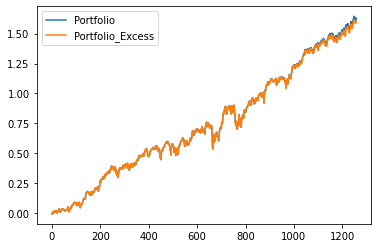

In [65]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

**Calculating beta using co-variance**

In [66]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(portfolio_beta)

5.7261263381549724e-05
5.8803350882118946e-05
0.9737755165745471


**Calculating beta with CAPM**

In [67]:
# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Fit the regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.7942627160017834
0.9737755165745479
